<h1>Affine transformations presentation</h1>  

In [1]:
import sys
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

CoordinatesMatrix: Creating an empty array that will store the coordinates of each pixel in relation to the reference point (which is the central pixel). In the for loop, we are filling the coordinates array with the right coordinates in relation to the input array size.

In [2]:
def affineTransformation(a1, a2, a3, a4, a5, a6, inputImageName):

    Taffine = np.array([[a1,a2,a3],[a4,a5,a6],[0,0,1]], int) # Calculating the Affine matrix.
    inputMatrix = np.array(Image.open(inputImageName)) # Converting the input image to a matrix.
    coordinatesMatrix = np.empty([3, len(inputMatrix[0]) * len(inputMatrix)], dtype=int) 
    middleRow = (len(inputMatrix) - 1) / 2                                               
    middleColumn = (len(inputMatrix[0]) - 1) / 2                                         

    for i in range(len(inputMatrix)):                                                    
        for j in range(len(inputMatrix[0])):                                             
            coordinatesMatrix[0][(len(inputMatrix[0]) * i) + j] = j - middleColumn
            coordinatesMatrix[1][(len(inputMatrix[0]) * i) + j] = i - middleRow
            coordinatesMatrix[2][(len(inputMatrix[0]) * i) + j] = 1

    newCoordinatesMatrix = Taffine @ coordinatesMatrix  # The transformation is the result of this calculation.
    imin = min(newCoordinatesMatrix[1]) # It is possible that the transformation will result in a bigger matrix,
    imax = max(newCoordinatesMatrix[1]) # therefore we calculate the maximum and minimum coordinates,
    jmin = min(newCoordinatesMatrix[0]) # in order to determine the size of the result matrix.
    jmax = max(newCoordinatesMatrix[0])
    resultMatrix = np.full([(imax - imin) + 1, (jmax - jmin) + 1], -1, dtype=int) # Initially, we fill the result matrix with -1's.

    for i in range(len(newCoordinatesMatrix[0])):
        resultMatrix[newCoordinatesMatrix[1][i]][newCoordinatesMatrix[0][i]] = inputMatrix[coordinatesMatrix[1][i]][coordinatesMatrix[0][i]]

    # After the above loop, only the pixels whose value will be determined by the nearest neighbour policy will have the value of -1, and that's how we spot them.

    return resultMatrix, inputMatrix



The double loop in the following function implements the nearest neighbour policy. I choose to use the neighbour with the lowest coordinates possible. Python uses lazy evaluation, so if the first condition in the if statements is false, the second won't be evaluated, so we won't go out of bounds.

In [3]:
def nearestNeighbour(resultMatrix, inputMatrix):
    resultMiddleRow = (len(resultMatrix) - 1) / 2
    resultMiddleColumn = (len(resultMatrix[0]) - 1) / 2
    
    for i in range(len(resultMatrix)): 
        for j in range(len(resultMatrix[0])): 
            if(resultMatrix[i,j] == -1):
                if((i - 1 > 0 and j - 1 > 0) and (resultMatrix[i - 1, j - 1] != -1)): 
                    resultMatrix[i][j] = resultMatrix[i - 1][j - 1]                   
                elif((i - 1 > 0) and (resultMatrix[i - 1, j] != -1)):                 
                    resultMatrix[i][j] = resultMatrix[i - 1][j]
                elif((j - 1 > 0) and (resultMatrix[i , j - 1] != -1)):
                    resultMatrix[i][j] = resultMatrix[i][j - 1]
                elif((i - 1 > 0 and j + 1 < len(resultMatrix[0])) and (resultMatrix[i - 1, j + 1] != -1)):
                    resultMatrix[i][j] = resultMatrix[i - 1][j + 1]
                elif((j - 1 > 0 and i + 1 < len(resultMatrix)) and (resultMatrix[i + 1, j - 1] != -1)):
                    resultMatrix[i][j] = resultMatrix[i + 1][j - 1]
                elif((j + 1 < len(resultMatrix[0])) and (resultMatrix[i, j + 1] != -1)):
                    resultMatrix[i][j] = resultMatrix[i][j + 1]
                elif((i + 1 < len(resultMatrix)) and (resultMatrix[i + 1, j] != -1)):
                    resultMatrix[i][j] = resultMatrix[i + 1][j]
                elif((j + 1 < len(resultMatrix[0])) and (i + 1 < len(resultMatrix)) and (resultMatrix[i + 1, j + 1] != -1)):
                    resultMatrix[i][j] = resultMatrix[i + 1][j + 1]

    startRow = int(resultMiddleRow - (len(inputMatrix) // 2)) # Calculating the area of the output image. It needs the input image's resolution.
    endRow = int(len(inputMatrix) + startRow - 1)
    startColumn = int(resultMiddleColumn - (len(inputMatrix[0]) // 2))
    endColumn = int(len(inputMatrix[0]) + startColumn - 1)
    outputMatrix = resultMatrix[startRow : (endRow + 1), startColumn : (endColumn + 1)]
    return outputMatrix



<!DOCTYPE html> 
<html> 
    <head> 
        <title>Header Tag</title> 
    </head> 
    <body> 
        <article> 
            <header> 
                <h1>Different affine transformations</h1>  
                <p>The original picture is shown below.</p> 
            </header> 
        </article> 
    </body> 
</html>      

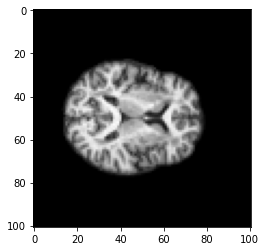

In [4]:
inputImageName = "brain0030slice150_101x101.png"
img = mpimg.imread(inputImageName)
imgplot = plt.imshow(img, cmap="gray")

The following image is a result of the parameters a1 = 0, a2 = 1, a3 = 0, a4 = -1, a5 = 0, a6 = 0.
This means that we rotate the picture by 90 degrees.

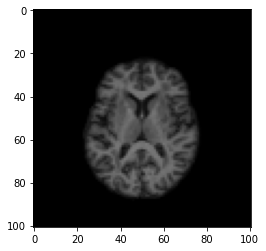

In [5]:
resultMatrix, inputMatrix = affineTransformation(a1 = 0, a2 = 1, a3 = 0, a4 = -1, a5 = 0, a6 = 0, inputImageName = inputImageName)
outputMatrix = nearestNeighbour(resultMatrix, inputMatrix)
outputImage = Image.fromarray(outputMatrix)
imgplot = plt.imshow(outputImage, cmap="gray")

The following image is a result of the parameters a1 = 2, a2 = 0, a3 = 0, a4 = 0, a5 = 1, a6 = 0. 
This means that we scale the image by 2 in the x-axis.

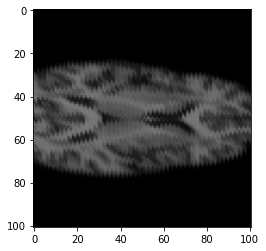

In [6]:
resultMatrix, inputMatrix = affineTransformation(a1 = 2, a2 = 0, a3 = 0, a4 = 0, a5 = 1, a6 = 0, inputImageName = inputImageName)
outputMatrix = nearestNeighbour(resultMatrix, inputMatrix)
outputImage = Image.fromarray(outputMatrix)
imgplot = plt.imshow(outputImage, cmap="gray")

The following image is a result of the parameters a1 = 1, a2 = 0, a3 = 20, a4 = 0, a5 = 1, a6 = 0.
This means that we move the picture by 20 pixels in the x-axis.

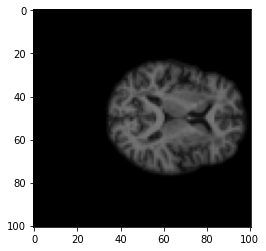

In [7]:
resultMatrix, inputMatrix = affineTransformation( a1 = 1, a2 = 0, a3 = 20, a4 = 0, a5 = 1, a6 = 0, inputImageName = inputImageName)
outputMatrix = nearestNeighbour(resultMatrix, inputMatrix)
outputImage = Image.fromarray(outputMatrix)
imgplot = plt.imshow(outputImage, cmap="gray")